## Solomon Akatakpo (PhD.)

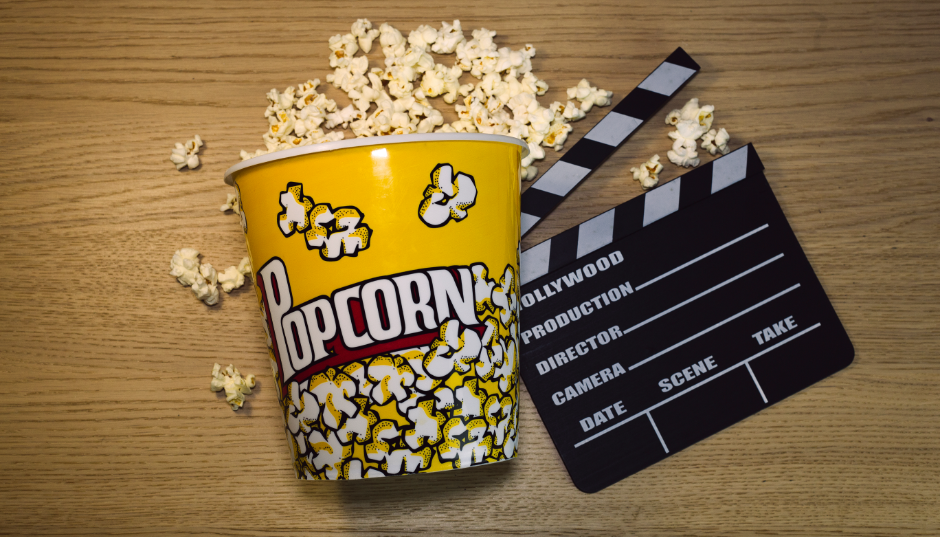

# **1. Problem Context**

Movie reviews help users decide whether a movie is worth watching or not. A summary of the reviews for a movie can help a user make quick decisions within a small period of time, rather than spending much more time reading multiple reviews for a movie. Sentiment analysis helps in rating how positive or negative a movie review is. Therefore, the process of understanding if a review is positive or negative can be automated as the machine learns different techniques from the domain of Natural Language Processing.

## **1.1 Objective**

The dataset contains 10,000 movie reviews. The objective is to do Sentiment Analysis(positive/negative) for the movie reviews using different techniques like supervised and unsupervised learning methods and compare which gives the better and most accurate results.

1. **Supervised models** - Some popular techniques used for encoding text:
    *           **Bag of Words**
    *           **TF-IDF** (**T**erm  **F**requency - **I**nverse **D**ocument **F**requency)
2. **Unsupervised models** - Some popular techniques used for unsupervised Sentiment Analysis:       
    *           **TextBlob**         
    *           **VADER Sentiment**
   


## **1.2 Data Dictionary**
- **review:** reviews of the movies.
- **sentiment:** indicates the sentiment of the review 0 or 1( 0 is for negative review and 1 for positive review)
<br> <br>

**Dataset source:** <br>
- IMDB Movie Ratings Sentiment Analysis: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis

# **2. Overview of the dataset**

## **2.1 Importing the libraries**

In [2]:
pip install unidecode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.0 MB/s eta 0:00:00


In [3]:
# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters

import unidecode

# Importing the NLTK library
import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

# downloading vader lexicon
nltk.download('vader_lexicon')

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Unsupervised learning models

# Install vader sentiment package
!pip install vaderSentiment

# Install textblob package
!pip install textblob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [4]:
#Connecting to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2.2 Loading the dataset**

In [5]:
# Loading data into pandas dataframe
filepath = '/content/drive/MyDrive/Data_Science/Introduction_to_NLP/imdb_10K_sentimnets_reviews.csv'

reviews = pd.read_csv(filepath)

#reviews = pd.read_csv(filepath, index_col = [0])

#reviews = pd.read_csv("imdb_10K_sentimnets_reviews.csv")

In [6]:
# Creating the copy of the data frame
data = reviews.copy()

## **2.3 Understanding the dataset**

In [7]:
# View the first and last 5 rows of the dataset
data.head(5)

,review,sentiment
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",1
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",0
2,"I am a kung fu fan, but not a Woo fan. I have no interest in gangster movies filled with over-the-top gun-play. Now, martial arts; *that's* beautiful! And John Woo surprised me here by producing a highly entertaining kung fu movie, which almost has *too much* fighting, if such a thing is possible! This is good stuff.<br /><br />Many of the fight scenes are very good (and some of them are less good), and the main characters are amusing and likable. The bad guys are a bit too unbelievably evil, but entertaining none the less. You gotta see the Sleeping Wizard!! He can only fight when he's asleep - it's hysterical!<br /><br />Upon repeated viewings, however, Last Hurrah For Chivalry can tend to get a little boring and long-winded, also especially because many of the fight scenes are actually not that good. Hence, I rate it ""only"" a 7 out of 10. But it really is almost an ""8"".<br /><br />All in all one of the better kung fu movies, made smack-dab in the heart of kung fu cinema's prime. All the really good kung fu movies are from the mid- to late 1970ies, with some notable exceptions from the late '60ies and early '70ies (and early '80ies, to be fair).",1
3,"He seems to be a control freak. I have heard him comment on ""losing control of the show"" and tell another guest who brought live animals that he had one rule-""n

In [8]:
data.tail()

,review,sentiment
9995,"A masterpiece.<br /><br />Thus it is, possibly, not for everyone.<br /><br />The camera work, acting, directing and everything else is unique, original, superb in every way - and very different from the trash we are sadly used to getting.<br /><br />Summer Phoenix creates a deep, believable and intriguing Esther Kahn. As everything else in this film, her acting is unique - it is completely her own - neither ""British"" nor ""American"" nor anything else I have ever seen. There is something mesmerizing about it.<br /><br />The lengthy, unbroken, natural shots are wonderful, reminding us that we have become too accustomed to a few restricted ways of shooting and editing.",1
9996,"Great movie about a great man. Thomas Kretschmann is first rate as in all of his other movies.I would never have envisioned him as Pope John Paul. It speaks volumes for the casting director. Why do they keep casting him as German officer in the movies? And he only came to universal attention after ""the pianist""? Of course he looks so hot in the uniforms. I know a lot of girls drool over his handsome face. But this guy is a great actor and has such great potentials. If you don't believe me, go watch ""Stalingrad"". I hope he will get a lot of excellent roles in the future with more diversity. Otherwise, what a heartbreaking waste of great talent.",1
9997,"Before we start, may I say I hope you've already eaten when you're reading this. Why? Because, after I'd seen this film for the first time, the bird's look and sound made me want to eat chicken after the words 'The End' had appeared on the screen. So don't say you weren't warned.<br /><br />Fred Sears might have directed ""Earth vs. the Flying Saucers"" (an okay film and one of the bigger examples for Tim Burton's ""Mars Attacks""), but ""The Giant Claw"" is not that giant a film. Yes, it's a prehistoric monster that flies in the air, attacks planes and cities and occasionally treats itself to a man on a parachute. The beast is giant except in the scenes where it's considerably smaller, but who needs consistent proportions in a movie? Scary? It could have been, but not if the plot is hopelessly silly and the monster looks like like a puppet that ran away from Sesame Street.",0
9998,"I was so disappointed by this show. After hearing and reading all the hoopla about it, how it was a ""ground breaking show"" and all sorts of wild promises if quality, I tried to watch it.<br /><br />What a letdown!! The acting was way forced and exaggerated. The story made very little sense. As for any hint of the vaunted ""look into teenagers' lives"", I could only see a paltry attempt that had as much reality to it as a reality show.<br /><br />Some are wondering why there are so many negative comments about this show. The reason is that it's really not all that good and beating the drums over quality on this show only serves to attract attention to how poorly made it is.",0
9999,"The 3-D featured in ""The Man Who Wasn't There"" stands for DUMB, DUMB, DUMB! This inept comedy features lousy 3-D effects that makes the 3-D effects in ""Jaws 3"", ""Amityville 3"", and ""Friday the 13th Part 3"" look better by comparison. Not to mention the movie is asinine to the extreme. This was one of many 1983 movies to feature the pop-off-the-screen effects. Steve Guttenberg and Jeffrey Tambor got trapped in this mess, but at least it didn't kill their careers. Tambor would go on to star on HBO's ""The Larry Sanders Show"" and Ron Howard's box office smash ""How the Grinch Stole Christmas"", while Guttenberg followed this flop with ""Police Academy"" and ""Cocoon"". What them in those projects instead of them here in ""The Man Who Wasn't There"". If you do, you'll regret it.<br /><br />1/2* (out of four)",0


* Here, a sentiment value of **0 is negative**, and **1 represents a positive sentiment.**

In [9]:
# Understand the shape of the dataset
data.shape

(10000, 2)

In [10]:
# Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


* Both the columns are object type.
* There are no null values in the dataset.

In [11]:
# checking for duplicate values
data.duplicated().sum()

18

In [12]:
# dropping the duplicates
data = data.drop_duplicates(keep = 'first')

# checking for duplicate values
data.duplicated().sum()

0

In [13]:
# resetting the index of the dataframe
data = data.reset_index(drop = True)

* The duplicate values have been removed.

# **3. Exploratory Data Analysis**

In [14]:
# Creating word cloud for negative reviews

negative_reviews = data[data['sentiment'] == 0]

words = ' '.join(negative_reviews['review'])

cleaned_word = " ".join([word for word in words.split()])

In [15]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

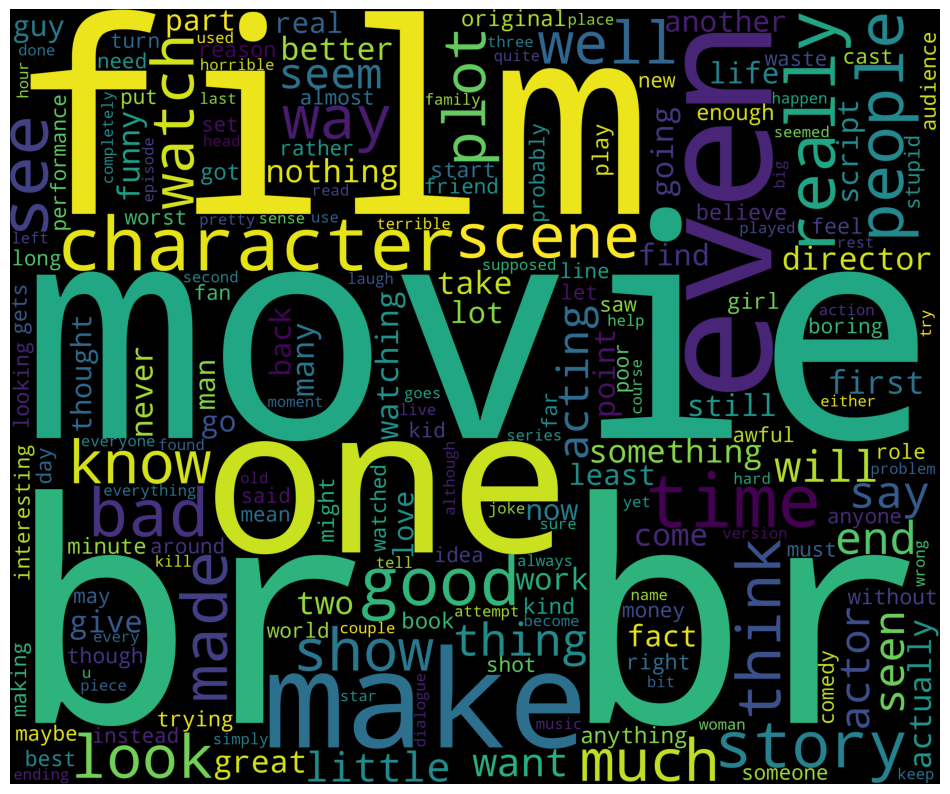

In [16]:
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

* The **even, bad, never, little, least, maybe, instead, waste, terrible, still, boring** were some of the important recurring words observed in the negative reviews.

In [17]:
# Creating word cloud for positive reviews
positive_reviews = data[data['sentiment'] == 1]

words = ' '.join(positive_reviews['review'])

cleaned_word = " ".join([word for word in words.split()])

In [18]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

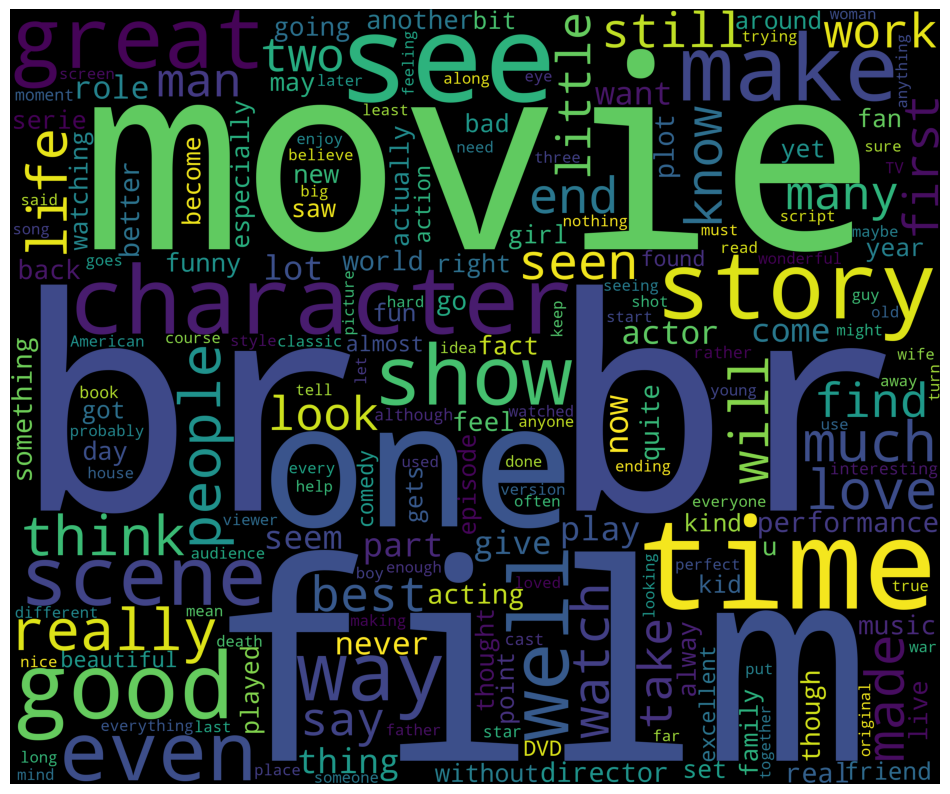

In [20]:
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

* **well, good, best, great, enjoy, interesting, wonderful, much, fun, beautiful, fun** were some of the important words observed in the positive reviews

In [21]:
# Check the labels
data['sentiment'].unique()

array([1, 0])

In [22]:
# check the count of each labels
data['sentiment'].value_counts()

1    5033
0    4949
Name: sentiment, dtype: int64

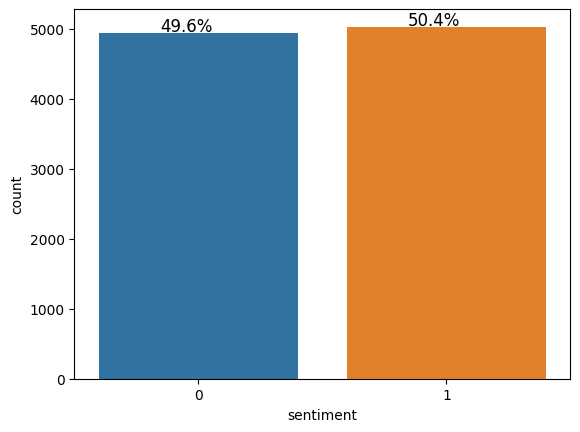

In [23]:
# Plot the distribution of the class label
def bar_plot(data, feature):
    # Creating the countplot
    plot = sns.countplot(x = feature, data = data)

    # Finding the length the whole data
    total = len(data)

    # Creating the percentages to each label in the data
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points")
    plt.show()

bar_plot(data,'sentiment')

- Data labels were pretty balanced, we can go ahead and proceed for further process

# **4. Data Pre-processing**

Before going to model building we should have to clean the data for the better model performance.

In [24]:
# Creating the lemmatizer

lm = WordNetLemmatizer()

In [25]:
final_corpus = []

for i in range(data.shape[0]):

    # removing the special characetrs, numbers from the data
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])

    # lowering the text
    review = review.lower()

    review = review.split()

    # removing the accented words
    review = [unidecode.unidecode(word) for word in review]

    # removing the stopwords and creating lemma words to each word present in the each row
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]

    # joining the corpus
    review = ' '.join(review)

    # Appending the result it into new list named final_corpus

    final_corpus.append(review)

In [26]:
# let's have look at the cleaned text
final_corpus[0]

'okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done'

In [27]:
final_corpus[1]

'despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth ren

In [28]:
# saving the cleaned text back to review column
data['review'] = final_corpus

In [29]:
data.head(5)

,review,sentiment
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1


We sucessfully cleaned the raw text and saved back to review column, now let's build the models.

# **5. Supervised Learning for Sentiment Analysis**

## **5.1 Bag of Words (CountVectorizer)**
      
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.


In [30]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 100 features as number of features will increase the processing time.
Count_vec = CountVectorizer(max_features = 1000)

data_features = Count_vec.fit_transform(data['review'])

# Convert the data features to array
data_features = data_features.toarray()

In [31]:
# Shape of the feature vector
data_features.shape

(9982, 1000)

In [32]:
X = data_features

y = data.sentiment

In [33]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [34]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1218
           1       0.83      0.80      0.82      1278

    accuracy                           0.82      2496
   macro avg       0.82      0.82      0.82      2496
weighted avg       0.82      0.82      0.82      2496



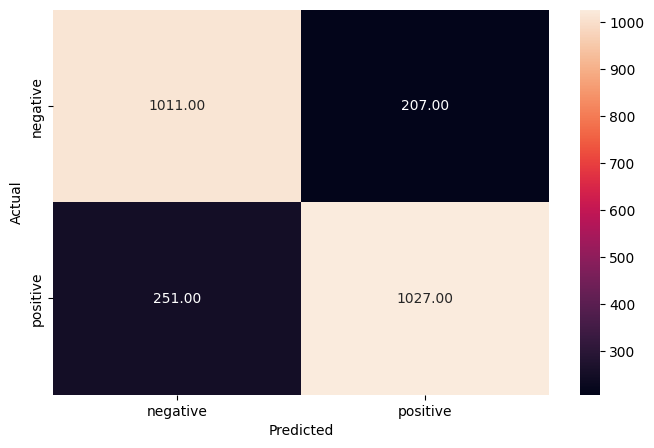

In [35]:
# Training the best model and calculating accuracy on test data

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

metrics_score(y_test, y_pred_test)

In [36]:
def get_top40_words(model, all_features):

    # Addition of top 40 feature into top_feature after training the model
    top_features=''

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','

    from wordcloud import WordCloud

    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000,
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

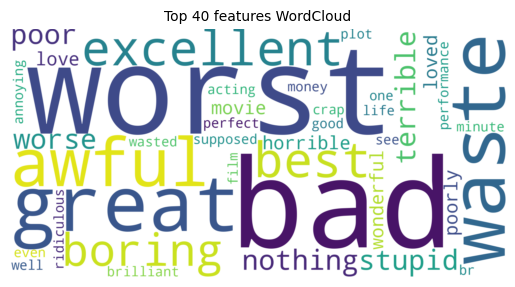

In [39]:
 #Instantiate the feature from the vectorizer
 import numpy as np
features = Count_vec.get_feature_names_out()

get_top40_words(clf,features)

## **5.2 TF-IDF**

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [40]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 1000)

data_features = tfidf_vect.fit_transform(data['review'])

data_features = data_features.toarray()

# Feature shape
data_features.shape

(9982, 1000)

In [41]:
X = data_features

y = data.sentiment

In [42]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1218
           1       0.84      0.80      0.82      1278

    accuracy                           0.82      2496
   macro avg       0.82      0.82      0.82      2496
weighted avg       0.82      0.82      0.82      2496



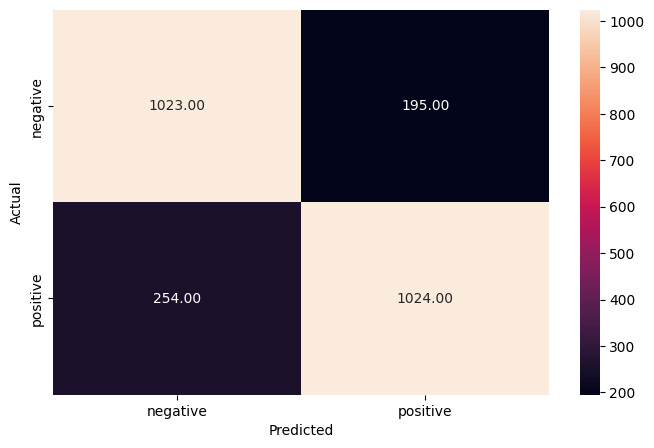

In [43]:
# Training the best model and calculating accuracy on test data

clf1 = RandomForestClassifier(n_estimators = 100)

clf1.fit(X_train, y_train)

y_pred_test1 = clf1.predict(X_test)

metrics_score(y_test, y_pred_test1)

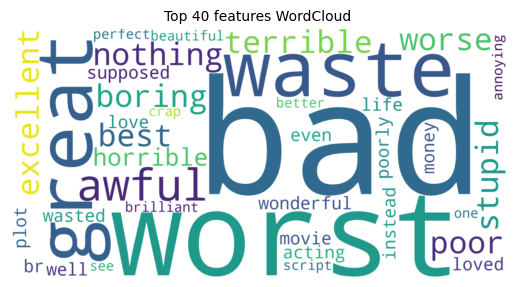

In [45]:
#Instantiate the feature from the vectorizer
features = tfidf_vect.get_feature_names_out()

get_top40_words(clf1,features)

##  **5.3 Comparing the scores of Supervised Learning methods: Count Vectorizer and TF-IDF**

In [51]:
#convert the test samples into a dataframe where the columns are

#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),
#Count Vectorizer model predicted labels(count_vectorizer_predicted)

df = pd.DataFrame(y_test.tolist(), columns = ['y_test'])

df['count_vectorizer_predicted'] = y_pred_test

df['tf_idf_predicted'] = y_pred_test1

df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1


* **TF-IDF shows a better performance than Count Vectorizer**, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# **6. Unsupervised Learning methods for Sentiment Analysis**

## **6.1 VADER**
**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a **lexicon** and **rule-based** sentiment analysis library or tool. It not only provides us  the Positivity and Negativity score of a sentiment, but also tells us the degree of positivity or negativity of it.

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [53]:
data_new = data.copy()   # make a copy of dataframe and do unsupervised operations on that dataframe

In [54]:
# Calculate the polarity score of the reviews
data_new['scores'] = data_new['review'].apply(lambda text: sentiment.polarity_scores(text))

data_new.head()

,review,sentiment,scores
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,"{'neg': 0.17, 'neu': 0.549, 'pos': 0.281, 'compound': 0.836}"
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,"{'neg': 0.109, 'neu': 0.632, 'pos': 0.259, 'compound': 0.9836}"
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,"{'neg': 0.26, 'neu': 0.43, 'pos': 0.309, 'compound': 0.5946}"
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,"{'neg': 0.153, 'neu': 0.696, 'pos': 0.15, 'compound': -0.0772}"
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1,"{'neg': 0.118, 'neu': 0.676, 'pos': 0.

In [55]:
# Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,review,sentiment,scores,compound
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,"{'neg': 0.17, 'neu': 0.549, 'pos': 0.281, 'compound': 0.836}",0.8360
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,"{'neg': 0.109, 'neu': 0.632, 'pos': 0.259, 'compound': 0.9836}",0.9836
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,"{'neg': 0.26, 'neu': 0.43, 'pos': 0.309, 'compound': 0.5946}",0.5946
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,"{'neg': 0.153, 'neu': 0.696, 'pos': 0.15, 'compound': -0.0772}",-0.0772
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1,"

In [56]:
# Classify the class of the review by keeping threshold on the compund score

data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,review,sentiment,scores,compound,comp_score
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,"{'neg': 0.17, 'neu': 0.549, 'pos': 0.281, 'compound': 0.836}",0.8360,1
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,"{'neg': 0.109, 'neu': 0.632, 'pos': 0.259, 'compound': 0.9836}",0.9836,1
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,"{'neg': 0.26, 'neu': 0.43, 'pos': 0.309, 'compound': 0.5946}",0.5946,1
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,"{'neg': 0.153, 'neu': 0.696, 'pos': 0.15, 'compound': -0.0772}",-0.0772,0
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added

In [57]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

,review,sentiment,VADER_pred
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,1
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,1
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,1
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,0
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1,1


              precision    recall  f1-score   support

           0       0.78      0.47      0.59      4949
           1       0.63      0.87      0.73      5033

    accuracy                           0.67      9982
   macro avg       0.70      0.67      0.66      9982
weighted avg       0.70      0.67      0.66      9982



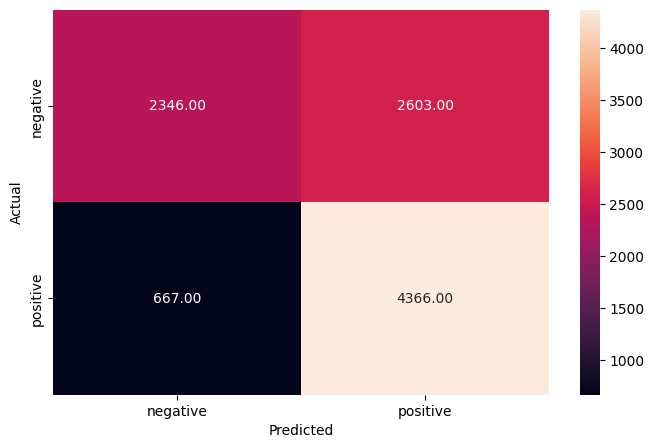

In [58]:
# Calculate the accuracy of the Vader Sentiment Analysis
data["sentiment"] = data["sentiment"].astype(int)   #convert the sentiment column values into int data type

data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type

metrics_score(data["sentiment"], data["VADER_pred"])

## **6.2 TextBlob**

In [59]:
from textblob import TextBlob

In [60]:
data_new = data.copy()      # make a copy of dataframe and do unsupervised operations on that dataframe

In [61]:
# Calculate the polarity score of the reviews
data_new['polarity']  = data_new['review'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()

,review,sentiment,VADER_pred,polarity
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,1,0.230303
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,1,0.158824
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,1,0.196548
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,0,-0.151240
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1,1,0.111097


In [62]:
# Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,review,sentiment,VADER_pred,polarity,polarity_score
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,1,0.230303,1
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,1,0.158824,1
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,1,0.196548,1
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,0,-0.151240,0
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1,1,0.111097,1


In [63]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,review,sentiment,VADER_pred,Text_Blob_pred
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life film find heaving sigh relief sadness climax musical interlude strength believable well done,1,1,1
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate movie admittedly harsh,0,1,1
2,kung fu fan woo fan interest gangster movie filled top gun play martial art beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scene good le good main character amusing likable bad guy bit unbelievably evil entertaining none le gotta see sleeping wizard fight asleep hysterical br br upon repeated viewing however last hurrah chivalry tend get little boring long winded also especially many fight scene actually good hence rate really almost br br one better kung fu movie made smack dab heart kung fu cinema prime really good kung fu movie mid late y notable exception late y early y early y fair,1,1,1
3,seems control freak heard comment losing control show tell another guest brought live animal one rule snake need hire comedy writer joke lame reason watch great guest band br br watched craig ferguson show show even worse like bull sh burn time think either man much future late night talk show br br daily also annoying habit sticking tongue lick lip must least time show like joe firstman band carson daily need lighten late,0,0,0
4,admittedly scene movie seem little unrealistic ravishing woman first panic minute later start kissing young lad old guy right next film go along learn little volatile girl slut partly explains behavior cinematography movie well done get see elevator almost every angle perspective image scene really raise tension g tz george play character well wannabe hot shot getting old overpowered young men like jaennicke character wolfgang kieling admired hitchcock torn curtain delivers great performance although say much far best actor play one critic complained unrealistic film real case emergency nothing would really happen realistic film mission impossible phone booth given fact talking movie movie always deal scene likely occur real life still enjoy movie lot better many thing see german tv day think vintage style added something film,1,1,1


              precision    recall  f1-score   support

           0       0.88      0.46      0.61      4949
           1       0.64      0.94      0.76      5033

    accuracy                           0.70      9982
   macro avg       0.76      0.70      0.68      9982
weighted avg       0.76      0.70      0.68      9982



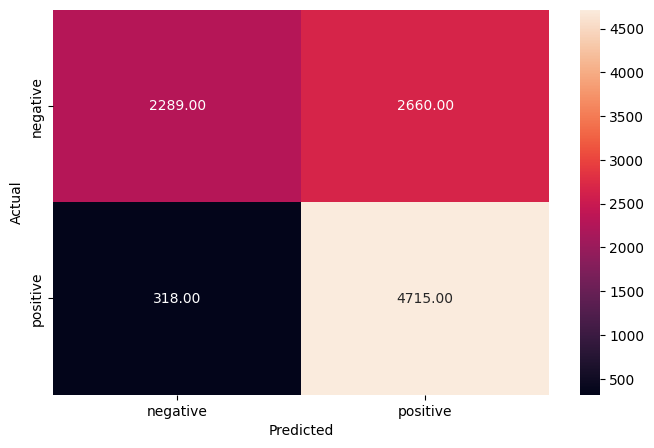

In [64]:
# Calculate the accuracy of the Vader Sentiment Analysis
data["sentiment"] = data["sentiment"].astype(int)  #convert the sentiment column values into int data type

data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type

metrics_score(data["sentiment"], data["Text_Blob_pred"])

- **Here, Text Blob works better than Vader because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.**

# **7. Conclusion**

* For sentiment analysis, we used two supervised learning approaches, TF-IDF and Bag-of-Words, and two unsupervised learning techniques, TextBlob and Vader.

* In supervised learning techniques, TF-IDF outperforms BoW since it not only considers the frequency of words in the corpus but also considers their importance.

* Textblob performed better than Vader among the unsupervised learning algorithms as our dataset comprises movie reviews which tend to use more formal language.